In [1]:
%tensorflow_version 1.x
%matplotlib inline
#import keras
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import callbacks
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from keras.applications import VGG16

conv_base_vgg = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(200, 200, 3))
conv_base_vgg.summary()











Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)   

In [3]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/drive/My Drive/DATA SCIENCE/LEZIONI/ML/Polignano/Keras/Challenge_Master_DS/training'
valid_dir = '/content/drive/My Drive/DATA SCIENCE/LEZIONI/ML/Polignano/Keras/Challenge_Master_DS/test'
test_dir = '/content/drive/My Drive/DATA SCIENCE/LEZIONI/ML/Polignano/Keras/Challenge_Master_DS/test_def'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=25,
    class_mode='categorical',
    seed=3)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(200, 200),
    batch_size=25,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=25,
    class_mode=None,
    shuffle=False,)

Found 938 images belonging to 6 classes.
Found 150 images belonging to 6 classes.
Found 77 images belonging to 6 classes.


In [0]:
y_foto = Image.open(valid_generator.filepaths[50])
y_res = y_foto.resize((300, 300), Image.NEAREST)
y_res

In [7]:
#from keras import optimizers
#from keras import regularizers

model_vgg = models.Sequential()
model_vgg.add(conv_base_vgg)
model_vgg.add(layers.Flatten())
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Dense(64, activation='relu'))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Dense(64, activation='relu'))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Dropout(.5))
model_vgg.add(layers.Dense(16, activation='relu'))
model_vgg.add(layers.Dense(6, activation='softmax'))

model_vgg.summary()

conv_base_vgg.trainable = False

model_vgg.compile(loss='categorical_crossentropy', 
              optimizer='Adam',
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 18432)             73728     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1179712   
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
____

In [0]:
early_stopping_cb = callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

checkpoint_cb = callbacks.ModelCheckpoint("modello_colab_norm_2.h5",
                                                save_best_only=True)


In [9]:
history = model_vgg.fit_generator(
    train_generator,
    steps_per_epoch=(train_generator.samples//train_generator.batch_size)+1,
    epochs=100,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples//valid_generator.batch_size,
    verbose=1,
    callbacks=[early_stopping_cb, checkpoint_cb]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
23/38 [=================>............] - ETA: 23s - loss: 1.7671 - acc: 0.3389

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


36/38 [===========================>..] - ETA: 2s - loss: 1.6382 - acc: 0.3865

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


38/38 [==============================] - 55s 1s/step - loss: 1.6109 - acc: 0.3999 - val_loss: 0.8388 - val_acc: 0.7667
Epoch 2/100
38/38 [==============================] - 50s 1s/step - loss: 1.1494 - acc: 0.5921 - val_loss: 0.5254 - val_acc: 0.8733
Epoch 3/100
38/38 [==============================] - 51s 1s/step - loss: 0.8833 - acc: 0.7012 - val_loss: 0.3461 - val_acc: 0.9067
Epoch 4/100
38/38 [==============================] - 51s 1s/step - loss: 0.7991 - acc: 0.7256 - val_loss: 0.3641 - val_acc: 0.8800
Epoch 5/100
38/38 [==============================] - 50s 1s/step - loss: 0.7231 - acc: 0.7617 - val_loss: 0.2304 - val_acc: 0.9333
Epoch 6/100
38/38 [==============================] - 50s 1s/step - loss: 0.6622 - acc: 0.7845 - val_loss: 0.2015 - val_acc: 0.9467
Epoch 7/100
38/38 [==============================] - 50s 1s/step - loss: 0.6695 - acc: 0.7785 - val_loss: 0.1853 - val_acc: 0.9533
Epoch 8/100
38/38 [==============================] - 50s 1s/step - loss: 0.5668 - acc: 0.8095 -

In [0]:
import pandas as pd

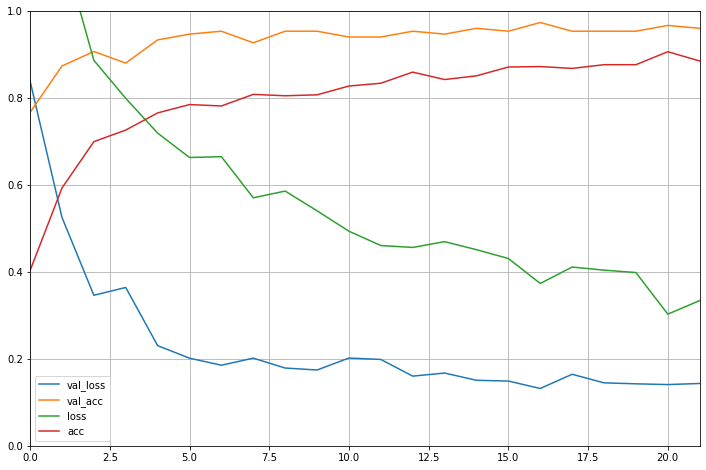

In [11]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [0]:
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc', color="red")
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss', color="red")
# plt.title('Training and validation loss')
# plt.legend()

#plt.show()

In [13]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=25,
    class_mode=None,
    shuffle=False,)
                                                        
Y_pred = model_vgg.predict_generator(test_generator, 
                                 steps=(test_generator.samples//test_generator.batch_size)+1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

y_pred

Found 77 images belonging to 6 classes.


array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 2, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [14]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [15]:
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred,  digits=4, target_names=class_labels))
print("Confusion Matrix: \n",confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

        city     1.0000    0.9000    0.9474        10
      desert     1.0000    0.9000    0.9474        10
    mountain     0.9286    1.0000    0.9630        13
      nature     0.9333    1.0000    0.9655        14
         sea     0.9375    0.8824    0.9091        17
    universe     0.9286    1.0000    0.9630        13

    accuracy                         0.9481        77
   macro avg     0.9547    0.9471    0.9492        77
weighted avg     0.9500    0.9481    0.9475        77

Confusion Matrix: 
 [[ 9  0  0  1  0  0]
 [ 0  9  0  0  1  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  1  0 15  1]
 [ 0  0  0  0  0 13]]


In [0]:
#model_vgg.save('modello_colab_norm_2.h5')